# Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Simulate a CSV file with unorganized data and missing values
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', None, 'Eve'],
    'Age': [25, np.nan, 35, 40, 28, None],
    'Gender': ['Female', 'Male', None, 'Male', 'Female', 'Female'],
    'Salary': [50000, 60000, None, 80000, 58000, 70000]
}

In [3]:
# Convert the dictionary to a DataFrame and save it as a CSV
file_path = "sample_data.csv"
pd.DataFrame(data).to_csv(file_path, index=False)

# Step 2: Load the Data

In [4]:
# Read the CSV file into a DataFrame

df = pd.read_csv(file_path)

# Step 3: Understand the Data

In [7]:
print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Data Types ---")
print(df.dtypes)

print("\n--- Summary ---")
print(df.info())

print("\n--- Statistical Overview ---")
print(df.describe(include='all'))



--- First 5 Rows ---
      Name   Age  Gender   Salary
0    Alice  25.0  Female  50000.0
1      Bob   NaN    Male  60000.0
2  Charlie  35.0     NaN      NaN
3    David  40.0    Male  80000.0
4      NaN  28.0  Female  58000.0

--- Data Types ---
Name       object
Age       float64
Gender     object
Salary    float64
dtype: object

--- Summary ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    5 non-null      object 
 1   Age     4 non-null      float64
 2   Gender  5 non-null      object 
 3   Salary  5 non-null      float64
dtypes: float64(2), object(2)
memory usage: 320.0+ bytes
None

--- Statistical Overview ---
         Name       Age  Gender        Salary
count       5   4.00000       5      5.000000
unique      5       NaN       2           NaN
top     Alice       NaN  Female           NaN
freq        1       NaN       3           NaN
mean   

# Step 4: Handle Missing Values

In [9]:
print("\n--- Missing Values ---")
print(df.isnull().sum())

# Strategy: Fill missing Age with the mean and drop rows with missing Name or Gender
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.dropna(subset=['Name', 'Gender'], inplace=True)

print("\n--- After Handling Missing Values ---")
print(df)



--- Missing Values ---
Name      0
Age       0
Gender    0
Salary    0
dtype: int64

--- After Handling Missing Values ---
    Name   Age  Gender   Salary
0  Alice  25.0  Female  50000.0
1    Bob  32.0    Male  60000.0
3  David  40.0    Male  80000.0
5    Eve  32.0  Female  70000.0


C:\Users\chanu\AppData\Local\Temp\ipykernel_10028\552930639.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


# Step 5: Clean the Data


In [10]:
# Rename columns for better readability
df.rename(columns={'Name': 'Employee Name', 'Salary': 'Monthly Salary'}, inplace=True)


# Step 6: Exploratory Data Analysis

In [13]:

# Analyze salary distribution
print("\n--- Salary Distribution ---")
print(df['Monthly Salary'].describe())


--- Salary Distribution ---
count        4.000000
mean     65000.000000
std      12909.944487
min      50000.000000
25%      57500.000000
50%      65000.000000
75%      72500.000000
max      80000.000000
Name: Monthly Salary, dtype: float64


# Step 7: Data Visualization


C:\Users\chanu\AppData\Local\Temp\ipykernel_10028\3972472959.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


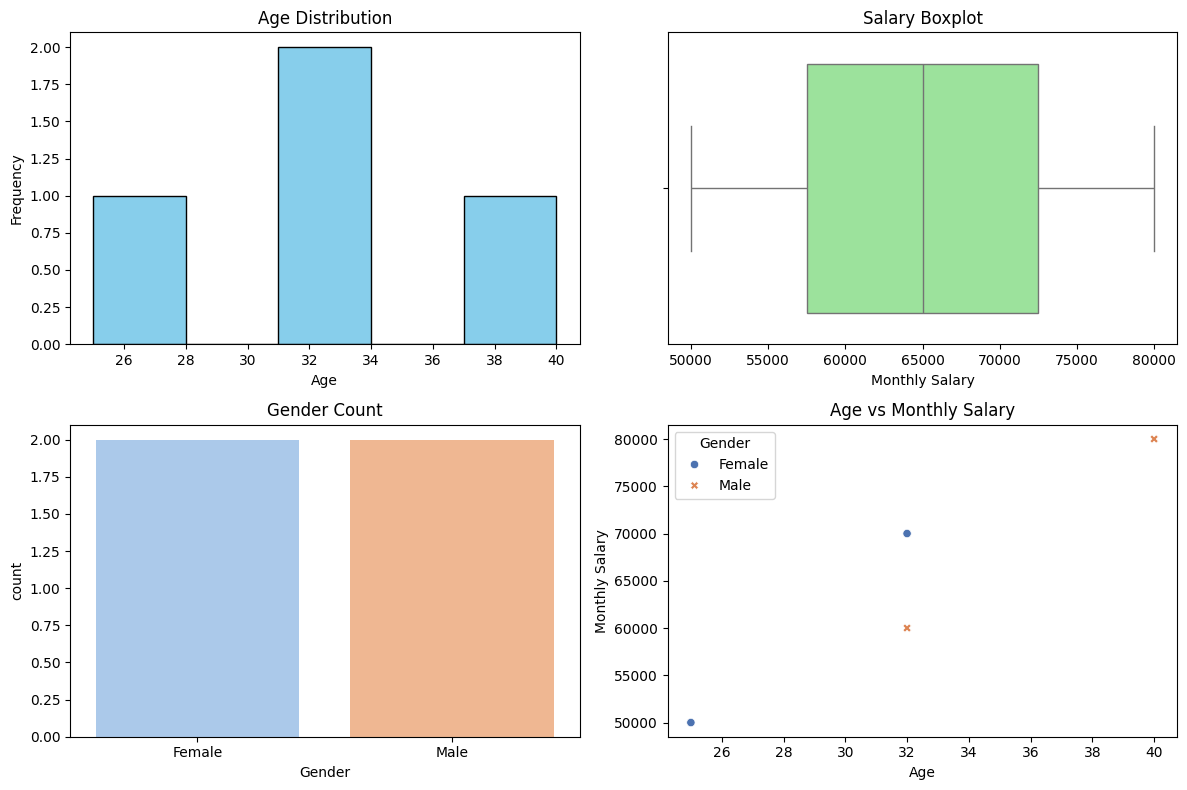

In [15]:
plt.figure(figsize=(12, 8))

# Histogram of Ages
plt.subplot(2, 2, 1)
plt.hist(df['Age'], bins=5, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Boxplot of Salary
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Monthly Salary', color='lightgreen')
plt.title('Salary Boxplot')

# Countplot of Gender
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Gender Count')

# Scatter plot: Age vs Salary
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='Age', y='Monthly Salary', hue='Gender', style='Gender', palette='deep')
plt.title('Age vs Monthly Salary')
plt.xlabel('Age')
plt.ylabel('Monthly Salary')

plt.tight_layout()
plt.show()
